# Baseline Algorithms

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from scipy import stats

### Read dataset

In [9]:
# read the data
df = pd.read_csv('../data/airbnb_total.csv', index_col=0)
#df = df.head(25000)

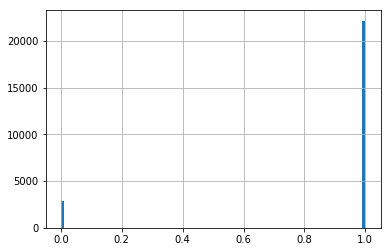

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df['satisfaction'].hist(bins=100)

In [11]:
df.satisfaction.value_counts()

1    22157
0     2843
Name: satisfaction, dtype: int64

In [5]:
df.shape

(25000, 138)

In [12]:
seed = 7
array = df.values
X = array[:,0:137]
Y = array[:,137]
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

### Run the Experiments

In [13]:
# set the scores
scoring = 'roc_auc'

In [14]:
# set the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', LinearSVC()))
models.append(('RF', RandomForestClassifier()))
models.append

<function list.append(object, /)>

In [15]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will 

LR: 0.638840 (0.026027)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.956037 (0.003347)
KNN: 0.655838 (0.012485)
CART: 0.773483 (0.014168)
NB: 0.626539 (0.007013)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increa

SVM: 0.831775 (0.051676)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF: 0.932742 (0.004655)


/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


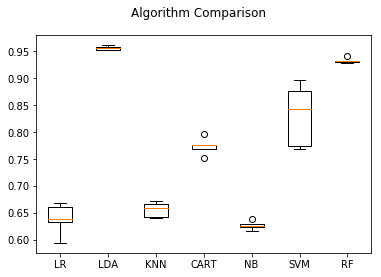

In [16]:
# save the models into a baseline algorithms png
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
fig.savefig('../reports/baseline-algorithms.png')

In [17]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Acurácia
0.884

Matrix de Confusão

[[  29  915]
 [  42 7264]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.41      0.03      0.06       944
         1.0       0.89      0.99      0.94      7306

   micro avg       0.88      0.88      0.88      8250
   macro avg       0.65      0.51      0.50      8250
weighted avg       0.83      0.88      0.84      8250



In [18]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.9352727272727273

Matrix de Confusão

[[ 510  434]
 [ 100 7206]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.84      0.54      0.66       944
         1.0       0.94      0.99      0.96      7306

   micro avg       0.94      0.94      0.94      8250
   macro avg       0.89      0.76      0.81      8250
weighted avg       0.93      0.94      0.93      8250



/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [19]:
knc = KNeighborsClassifier()
knc.fit(X_train, Y_train)
predictions = knc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.884

Matrix de Confusão

[[ 175  769]
 [ 188 7118]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27       944
         1.0       0.90      0.97      0.94      7306

   micro avg       0.88      0.88      0.88      8250
   macro avg       0.69      0.58      0.60      8250
weighted avg       0.85      0.88      0.86      8250



In [20]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.9127272727272727

Matrix de Confusão

[[ 607  337]
 [ 383 6923]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63       944
         1.0       0.95      0.95      0.95      7306

   micro avg       0.91      0.91      0.91      8250
   macro avg       0.78      0.80      0.79      8250
weighted avg       0.91      0.91      0.91      8250



In [21]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.11454545454545455

Matrix de Confusão

[[ 943    1]
 [7304    2]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.11      1.00      0.21       944
         1.0       0.67      0.00      0.00      7306

   micro avg       0.11      0.11      0.11      8250
   macro avg       0.39      0.50      0.10      8250
weighted avg       0.60      0.11      0.02      8250



In [22]:
svn = LinearSVC()
svn.fit(X_train, Y_train)
predictions = svn.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

Acurácia
0.8928484848484849

Matrix de Confusão

[[ 135  809]
 [  75 7231]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.64      0.14      0.23       944
         1.0       0.90      0.99      0.94      7306

   micro avg       0.89      0.89      0.89      8250
   macro avg       0.77      0.57      0.59      8250
weighted avg       0.87      0.89      0.86      8250



/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [23]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
predictions = rf.predict(X_validation)
print('Acurácia')
print(accuracy_score(Y_validation, predictions))
print('\nMatrix de Confusão\n')
print(confusion_matrix(Y_validation, predictions))
print('\nReport de Classificação\n')
print(classification_report(Y_validation, predictions))

/home/geanderson/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Acurácia
0.9306666666666666

Matrix de Confusão

[[ 569  375]
 [ 197 7109]]

Report de Classificação

              precision    recall  f1-score   support

         0.0       0.74      0.60      0.67       944
         1.0       0.95      0.97      0.96      7306

   micro avg       0.93      0.93      0.93      8250
   macro avg       0.85      0.79      0.81      8250
weighted avg       0.93      0.93      0.93      8250

